In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv(r"C:\Users\divaa\OneDrive\Desktop\pri\Bliend\Bliend dataset\customer_segmentation.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:

print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:

print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


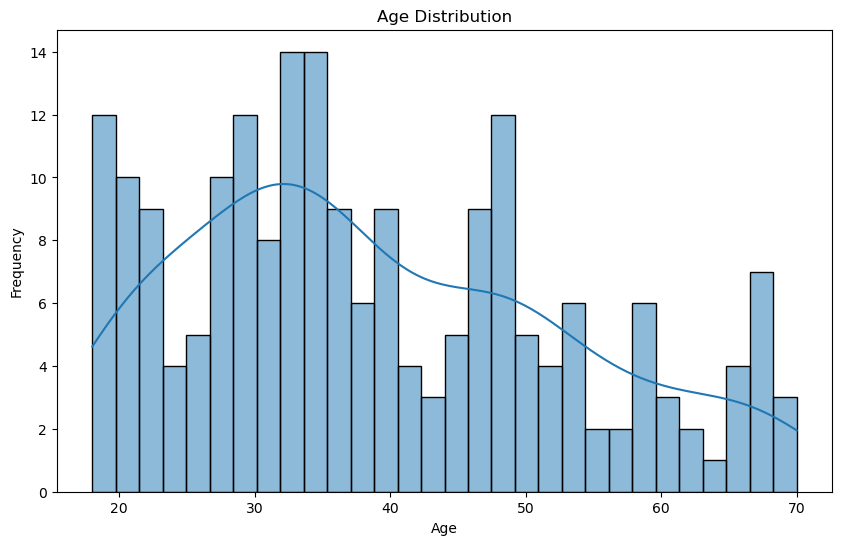

In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

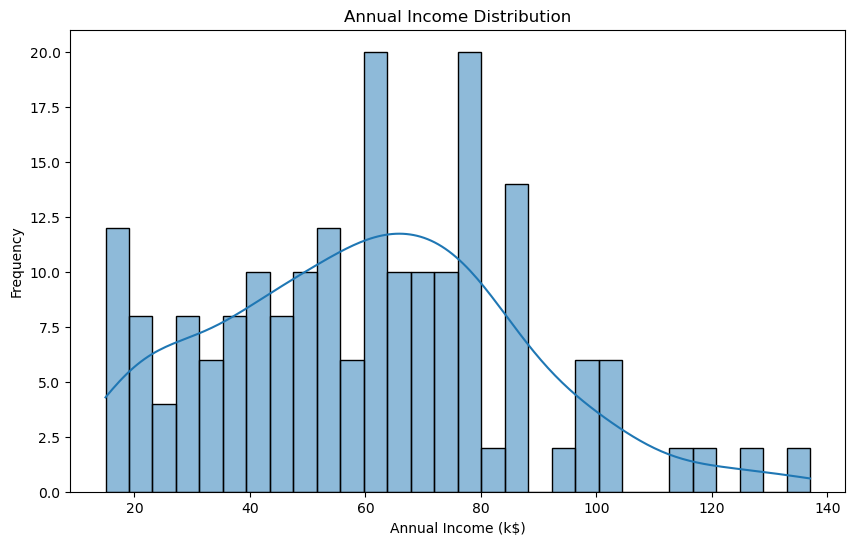

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

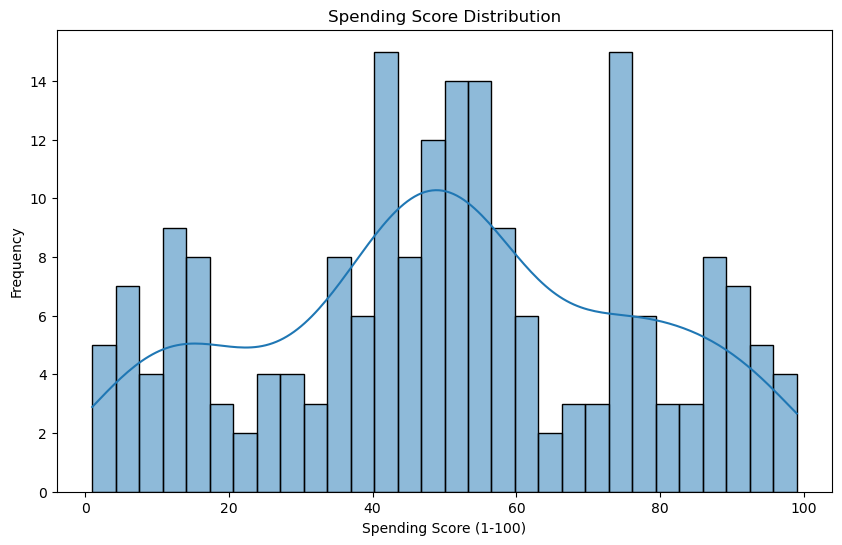

In [20]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=30)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

C:\Users\divaa\anaconda_new\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
C:\Users\divaa\anaconda_new\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


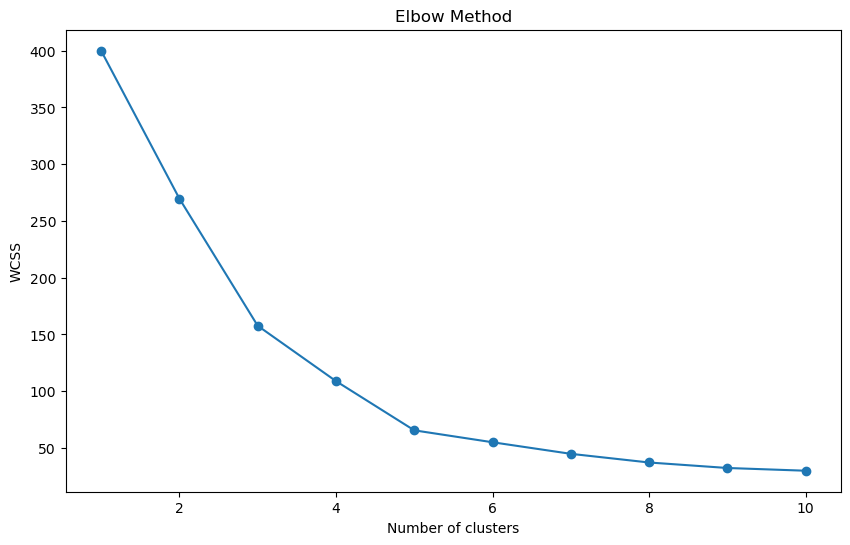

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42, algorithm='elkan')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [74]:

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [76]:

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_scaled, df['Spending Score (1-100)'])


KNeighborsClassifier()

In [78]:

y_pred = knn.predict(X_scaled)
print(confusion_matrix(df['Spending Score (1-100)'], y_pred))
print(classification_report(df['Spending Score (1-100)'], y_pred))


[[2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       0.27      0.75      0.40         4
           6       1.00      0.50      0.67         2
           7       0.33      1.00      0.50         1
           8       0.33      1.00      0.50         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.17      0.33      0.22         3
          14       0.29      0.50      0.36         4
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          17   

C:\Users\divaa\anaconda_new\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\divaa\anaconda_new\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\divaa\anaconda_new\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\divaa\anaconda_new\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


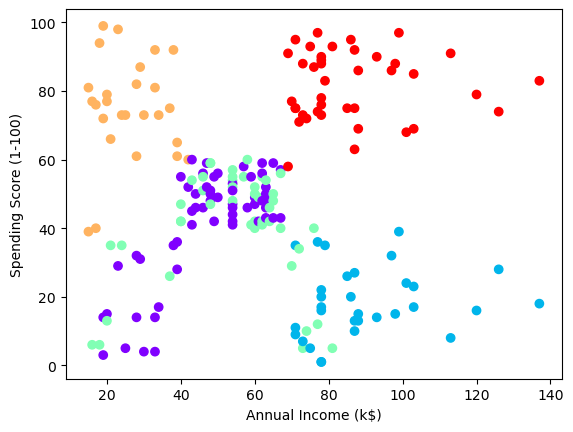

In [80]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5) 
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        44.387097           89.774194               18.483871
2        26.733333           54.311111               40.911111
3        25.769231           26.115385               74.846154
4        32.875000           86.100000               81.525000


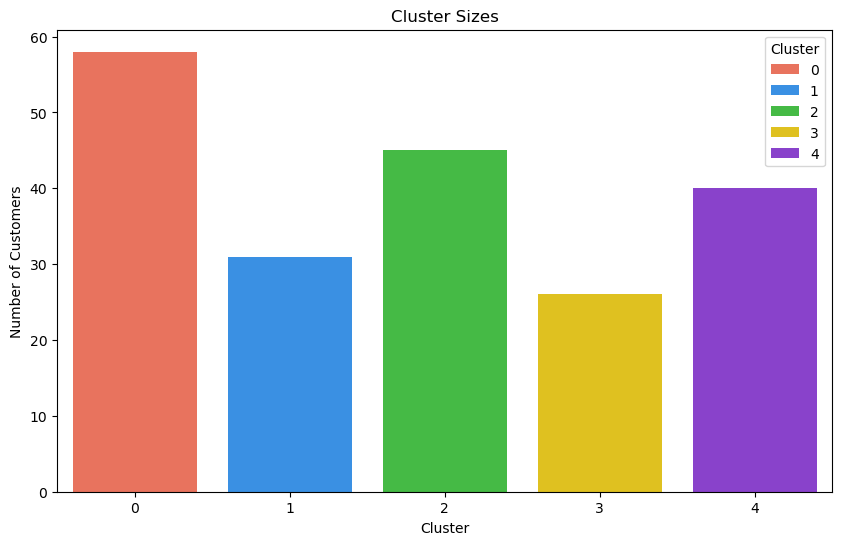

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df.drop(columns=['CustomerID', 'Gender'])  # Drop non-numeric columns
unique_colors = ['#FF6347', '#1E90FF', '#32CD32', '#FFD700', '#8A2BE2']  # Added an extra color
cluster_summary = df_numeric.groupby('Cluster').mean()[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
print(cluster_summary)
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df, palette=unique_colors, hue='Cluster', dodge=False)
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.legend(title='Cluster')
plt.show()


In [84]:

print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1     NaN   19                  15                      39   
1           2     NaN   21                  15                      81   
2           3     NaN   20                  16                       6   
3           4     NaN   23                  16                      77   
4           5     NaN   31                  17                      40   

   Cluster  
0        3  
1        3  
2        2  
3        3  
4        3  


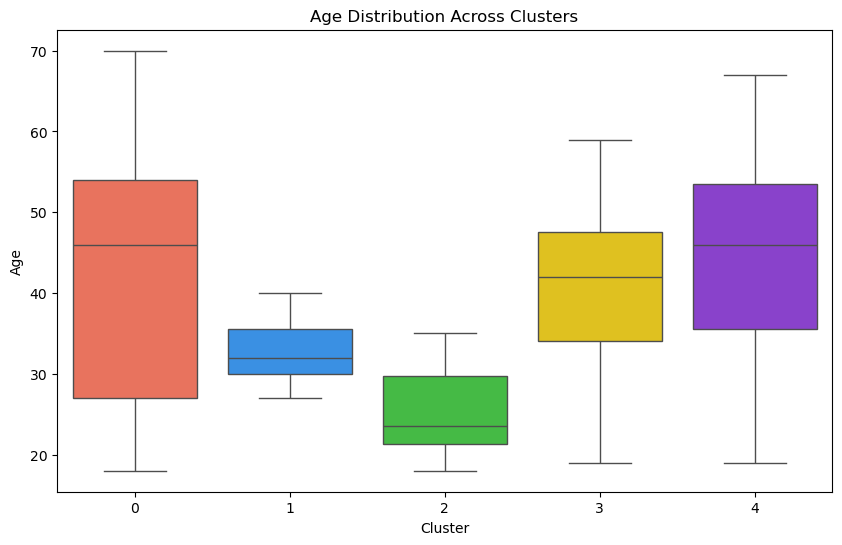

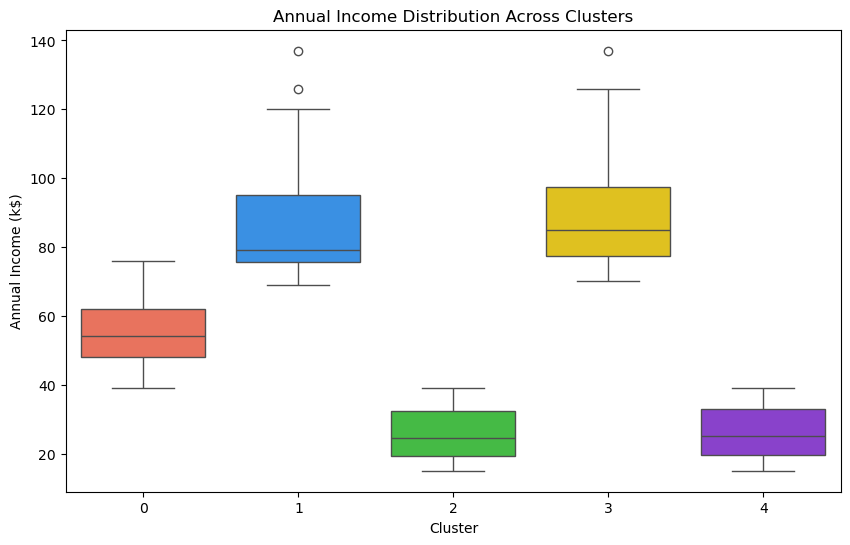

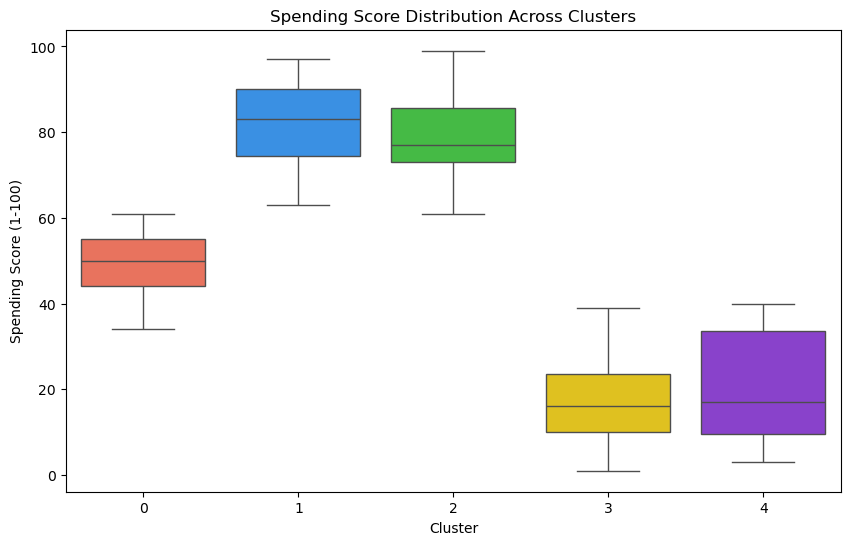

In [64]:

unique_colors = ['#FF6347', '#1E90FF', '#32CD32', '#FFD700', '#8A2BE2']

# Boxplot for Age distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=df, hue='Cluster', palette=unique_colors, dodge=False)
plt.legend([],[], frameon=False)  # Hide legend if not needed
plt.title('Age Distribution Across Clusters')
plt.show()

# Boxplot for Annual Income distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, hue='Cluster', palette=unique_colors, dodge=False)
plt.legend([],[], frameon=False)  # Hide legend if not needed
plt.title('Annual Income Distribution Across Clusters')
plt.show()

# Boxplot for Spending Score distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, hue='Cluster', palette=unique_colors, dodge=False)
plt.legend([],[], frameon=False)  # Hide legend if not needed
plt.title('Spending Score Distribution Across Clusters')
plt.show()


C:\Users\divaa\anaconda_new\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


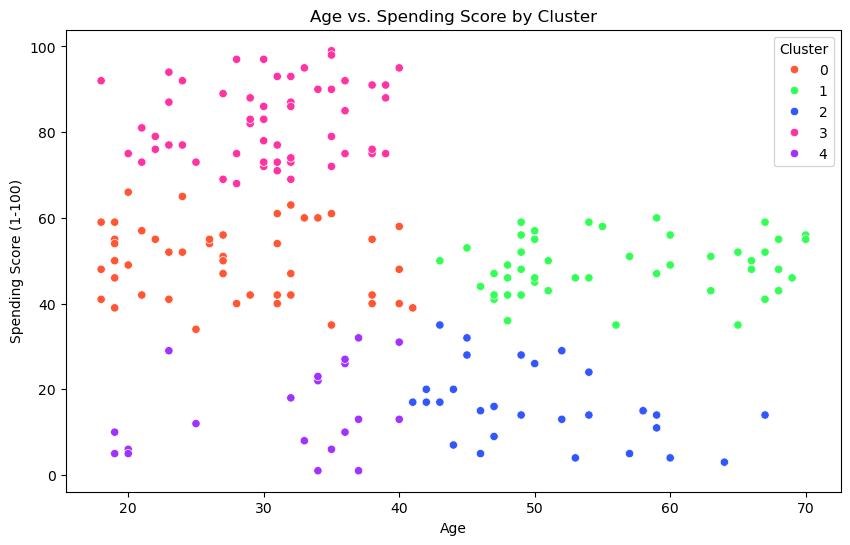

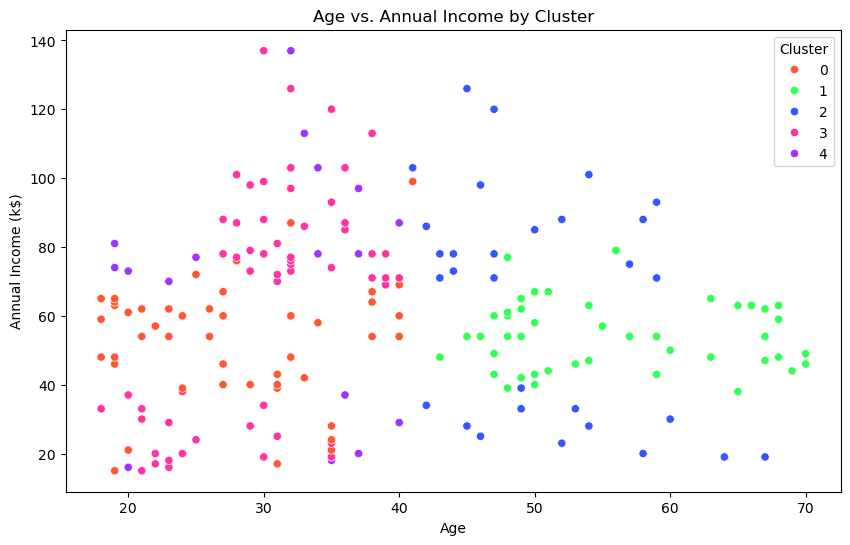

Cluster Centers (Age, Spending Score):
[[27.81308411 49.08010681]
 [55.35519802 48.26485149]
 [50.36417323 16.41141732]
 [30.50544016 82.57171118]
 [31.2654321  15.52469136]]


In [66]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
df_cluster = df[['Age', 'Spending Score (1-100)']]  # Or you can use ['Age', 'Annual Income (k$)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, init='k-means++', max_iter=300, batch_size=100, random_state=42)
df['Cluster'] = minibatch_kmeans.fit_predict(df_scaled)
unique_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#A133FF']  # Customize with more unique colors


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette=unique_colors)
plt.title('Age vs. Spending Score by Cluster')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette=unique_colors)
plt.title('Age vs. Annual Income by Cluster')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# Optional: If you want to display the cluster centers
centers = scaler.inverse_transform(minibatch_kmeans.cluster_centers_)
print("Cluster Centers (Age, Spending Score):")
print(centers)


In [88]:
# Drop non-numeric columns for numerical analysis
df_numeric = df.drop(columns=['CustomerID', 'Gender'])  # Drop non-numeric columns like 'Gender'

# Group by cluster and calculate the mean for each cluster
cluster_summary = df_numeric.groupby('Cluster').mean()
print("Cluster Summary (Mean Values):")
print(cluster_summary)

# Get the size of each cluster (number of customers in each cluster)
cluster_sizes = df_numeric['Cluster'].value_counts().sort_index()
print("\nCluster Sizes (Number of Customers per Cluster):")
print(cluster_sizes)

# If you also want median values for more robustness:
cluster_median = df_numeric.groupby('Cluster').median()
print("\nCluster Summary (Median Values):")
print(cluster_median)

# If you want to see additional statistics like standard deviation, min, max, etc., you can use:
cluster_stats = df_numeric.groupby('Cluster').describe()
print("\nCluster Detailed Statistics:")
print(cluster_stats)


Cluster Summary (Mean Values):
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        44.387097           89.774194               18.483871
2        26.733333           54.311111               40.911111
3        25.769231           26.115385               74.846154
4        32.875000           86.100000               81.525000

Cluster Sizes (Number of Customers per Cluster):
Cluster
0    58
1    31
2    45
3    26
4    40
Name: count, dtype: int64

Cluster Summary (Median Values):
          Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                  
0        53.0                48.5                    46.0
1        44.0                87.0                    17.0
2        26.0                59.0                    46.0
3        24.0                24.5                    75.5
4        32.0         

Cluster 0: Customers are older (mean age 43), have a moderate income (mean $55k), and an average spending score (mean 50). This group represents a balanced customer segment in terms of spending and income.

Cluster 1: Customers are younger (mean age 33), have a high income (mean $87k), and a very high spending score (mean 82). These are affluent and high-spending customers.

Cluster 2: Customers are the youngest (mean age 25), have a low income (mean $26k), but a high spending score (mean 79). This segment spends more despite lower incomes.

Cluster 3: Customers are middle-aged (mean age 41), have a high income (mean $88k), but a very low spending score (mean 17). These high-income customers are conservative spenders.

Cluster 4: Customers are older (mean age 45), have a low income (mean $26k), and a low spending score (mean 21). This group has both low income and low spending behavior.

The customer segmentation reveals five distinct groups with varying age, income, and spending behaviors. Affluent, high-spending customers (Cluster 1) should be targeted with premium offers, while younger, budget-conscious groups (Clusters 2 and 4) respond better to affordable, trendy products. Middle-aged, high-income but conservative spenders (Cluster 3) need value-focused strategies to increase engagement.